In [14]:
import pandas as pd

data=pd.read_csv("E:/R(5)/MinMax.csv")
x = data.drop('classification', axis=1)
y = data['classification']

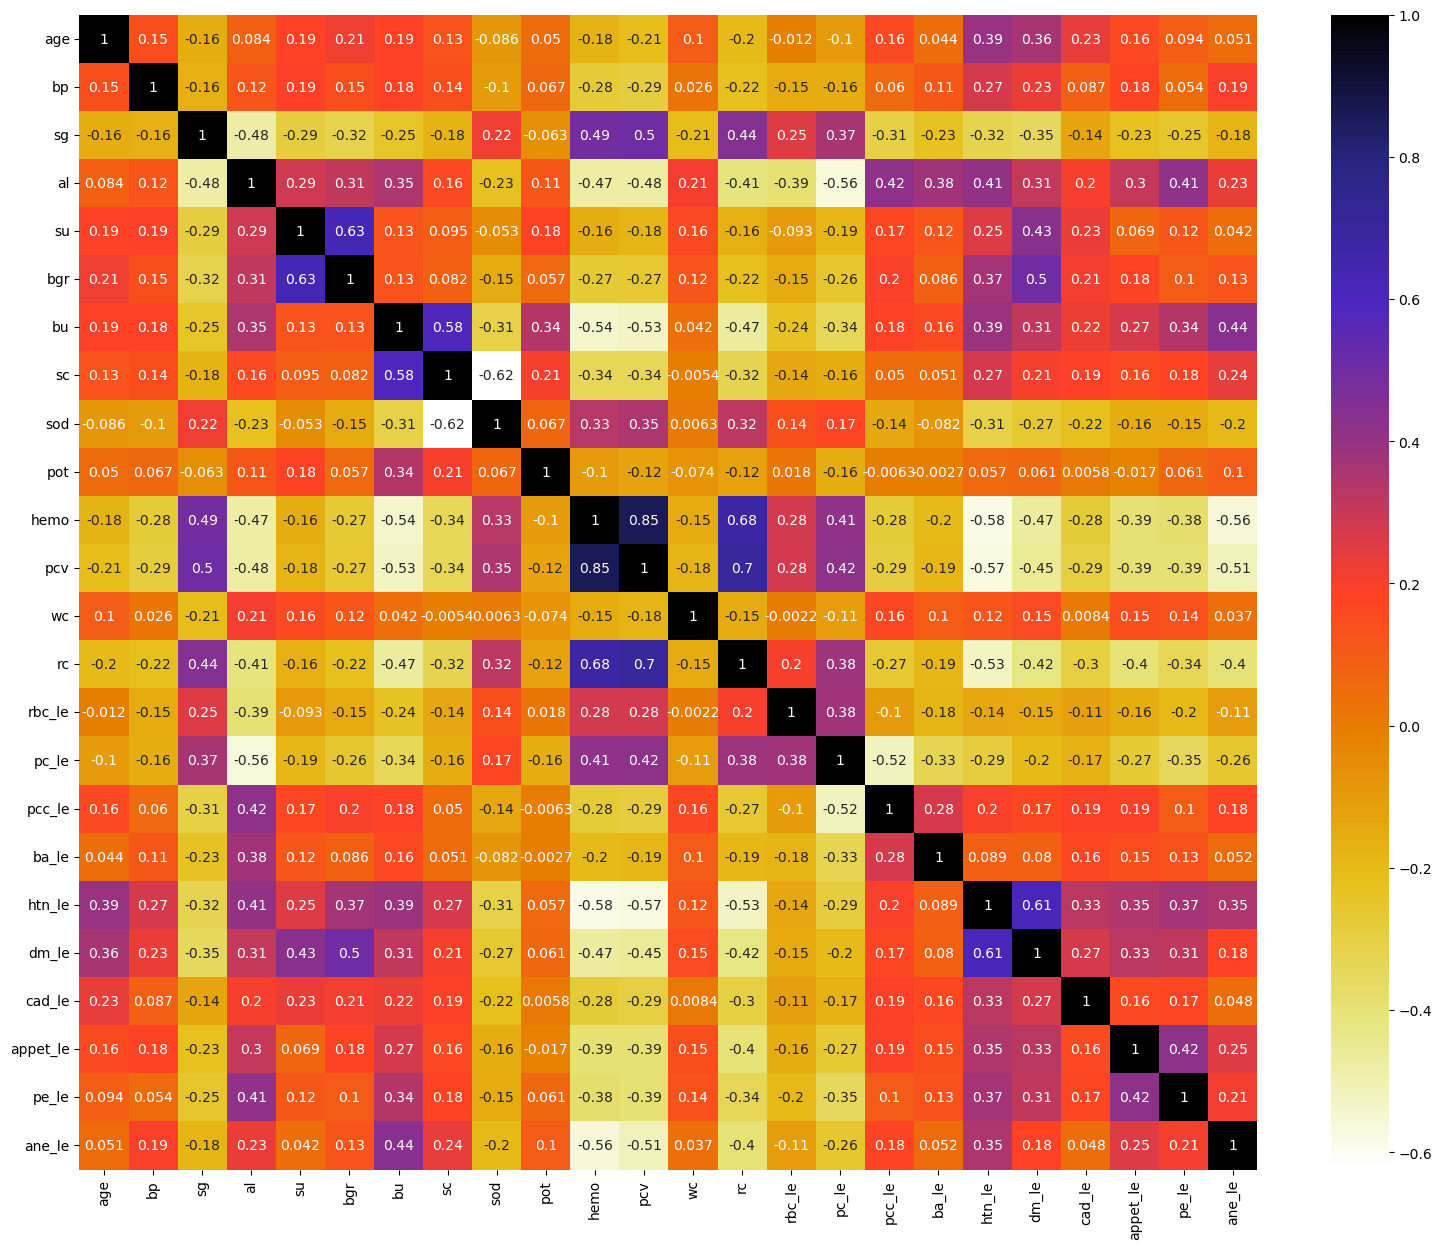

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(19,15))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(x, 0.7)
len(set(corr_features))

2

In [18]:
corr_features

{'pcv', 'rc'}

In [19]:
df1=x.drop(corr_features,axis=1)
df1['label']=y
df1.to_csv('E:/R(5)/Dataset_1.csv')

In [20]:
# chi-ssquare
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectFpr, chi2
selector = SelectFpr(score_func=chi2, alpha=0.05)
new_data = selector.fit_transform(x, y)
 
mask = selector.get_support()
new_features = x.columns[mask]
print(new_features)

Index(['sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'rc', 'pc_le',
       'pcc_le', 'ba_le', 'htn_le', 'dm_le', 'cad_le', 'appet_le', 'pe_le',
       'ane_le'],
      dtype='object')


In [21]:
df2 = data.drop(data.columns.difference(['sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo', 'pcv', 'rc', 'pc_le',
       'pcc_le', 'ba_le', 'htn_le', 'dm_le', 'cad_le', 'appet_le', 'pe_le',
       'ane_le']) , axis=1)
df2['label']=y
df2.to_csv('E:/R(5)/Dataset_2.csv')

In [22]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0.1)
var = var.fit(x)
cols = var.get_support(indices=True)
cols
features = x.columns[cols]
features

Index(['rbc_le', 'pc_le', 'htn_le', 'dm_le', 'appet_le', 'pe_le', 'ane_le'], dtype='object')

In [23]:
df3 = data.drop(data.columns.difference(['rbc_le', 'pc_le', 'htn_le', 'dm_le', 'appet_le', 'pe_le', 'ane_le']) , axis=1)
df3['label']=y
df3.to_csv('E:/R(5)/Dataset_3.csv')

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 13)

rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select = 4)
rfecv = rfecv.fit(x, y)
cols = rfecv.get_support(indices=True)
cols
features = x.columns[cols]
features

Index(['sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rc', 'htn_le',
       'dm_le'],
      dtype='object')

In [25]:
df4 = data.drop(data.columns.difference(['sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rc', 'htn_le',
       'dm_le']) , axis=1)
df4['label']=y
df4.to_csv('E:/R(5)/Dataset_4.csv')

In [26]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          cv = 0)
sfs.fit(x, y)
cols = list(sfs.k_feature_names_)
cols

['bp',
 'sg',
 'al',
 'bgr',
 'bu',
 'sc',
 'hemo',
 'htn_le',
 'dm_le',
 'appet_le',
 'ane_le']

In [27]:
df5 = data.drop(data.columns.difference(['bp','sg','al','bgr','bu','sc','hemo','htn_le','dm_le','appet_le','ane_le']) , axis=1)
df5['label']=y
df5.to_csv('E:/R(5)/Dataset_5.csv')

In [28]:
# lasso regression feature selection
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

width_in_inches = 250
height_in_inches = 250
dots_in_inch = 10

lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(x,y).coef_
print(lasso_coef)

[-0.          0.         -0.56411526  0.0972886   0.          0.
  0.          0.         -0.          0.         -0.65010209 -0.
  0.         -0.         -0.         -0.          0.          0.
  0.17099686  0.15635925  0.          0.05712655  0.          0.        ]


In [29]:
import numpy as np
names = data.drop('classification',axis=1).columns
np.array(names)[(lasso_coef > 0.1)] 

array(['htn_le', 'dm_le'], dtype=object)

In [30]:
df6 = data.drop(data.columns.difference(['htn_le', 'dm_le']) , axis=1)
df6['label']=y
df6.to_csv('E:/R(5)/Dataset_6.csv')

In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge_coef = ridge.fit(x,y).coef_
print(ridge_coef)

[-0.02406409  0.24378928 -0.5481366   0.19059114 -0.02827542  0.20027066
 -0.29908271  0.24169299 -0.27634351  0.0978767  -0.87618987 -0.17508702
  0.07720764 -0.11042761 -0.02800352  0.0426524  -0.02611025 -0.05227026
  0.11945575  0.1203216  -0.04962127  0.0657107   0.02624619 -0.07644774]


In [32]:
np.array(names)[ridge_coef > 0]

array(['bp', 'al', 'bgr', 'sc', 'pot', 'wc', 'pc_le', 'htn_le', 'dm_le',
       'appet_le', 'pe_le'], dtype=object)

In [33]:
df7 = data.drop(data.columns.difference(['bp', 'al', 'bgr', 'sc', 'pot', 'wc', 'pc_le', 'htn_le', 'dm_le', 'appet_le', 'pe_le']) , axis=1)
df7['label']=y
df7.to_csv('E:/R(5)/Dataset_7.csv')